In [127]:
import pandas as pd


student_data = pd.read_csv('student_data.csv')
teacher_data = pd.read_csv('teacher_data.csv')

# Extract batch number from StudentID
student_data['Batch'] = student_data['StudentID'].str.extract('(\d+)').astype(int)


student_department_counts = student_data['Department'].value_counts()

print("Number of students in each department:")
for dept, count in student_department_counts.items():
    print(f"{dept}: {count}")
print(f"Total students: {student_department_counts.sum()}")


student_batch_counts = student_data['Batch'].value_counts()


print("\nNumber of students in each batch:")
for batch, count in student_batch_counts.items():
    print(f"Batch {batch}: {count}")


student_department_batch_counts = student_data.groupby(['Batch', 'Department']).size()


print("\nNumber of students in each department per batch:")
print(student_department_batch_counts)


teacher_department_counts = teacher_data['Department'].value_counts()


print("\nNumber of teachers in each department:")
for dept, count in teacher_department_counts.items():
    print(f"{dept}: {count}")
print(f"Total teachers: {teacher_department_counts.sum()}")


print("\nTotal number of students:", len(student_data))
print("Total number of teachers:", len(teacher_data))
print("Total number of departments for students:", len(student_department_counts))
print("Total number of departments for teachers:", len(teacher_department_counts))


Number of students in each department:
EE: 525
AI: 511
SE: 494
BA: 489
CS: 481
Total students: 2500

Number of students in each batch:
Batch 22: 1000
Batch 19: 500
Batch 20: 500
Batch 21: 500

Number of students in each department per batch:
Batch  Department
19     AI             94
       BA             90
       CS             97
       EE            102
       SE            117
20     AI             98
       BA             94
       CS             97
       EE            111
       SE            100
21     AI            114
       BA             90
       CS             89
       EE            112
       SE             95
22     AI            205
       BA            215
       CS            198
       EE            200
       SE            182
dtype: int64

Number of teachers in each department:
EE: 27
AI: 19
SE: 19
CS: 18
BA: 17
Total teachers: 100

Total number of students: 2500
Total number of teachers: 100
Total number of departments for students: 5
Total number of department

In [120]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


student_data = pd.read_csv('student_data.csv')
teacher_data = pd.read_csv('teacher_data.csv')


student_data = student_data.dropna() 
teacher_data = teacher_data.dropna()


label_encoder = LabelEncoder()
student_data['Department'] = label_encoder.fit_transform(student_data['Department'])
teacher_data['Department'] = label_encoder.fit_transform(teacher_data['Department'])


# Print the preprocessed data
print("Preprocessed student data:")
print(student_data.head())
print("\nPreprocessed teacher data:")
print(teacher_data.head())


Preprocessed student data:
  StudentID     Name  Department  batch
0  19F-0001    Layla           4     19
1  19F-0002     Zayd           1     19
2  19F-0003  Ibrahim           2     19
3  19F-0004    Anaya           4     19
4  19F-0005    Kabir           4     19

Preprocessed teacher data:
  TeacherID     Name  Department
0      T001  Charlie           0
1      T002    Julia           0
2      T003      Uma           1
3      T004    Wendy           1
4      T005    Julia           2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\clust

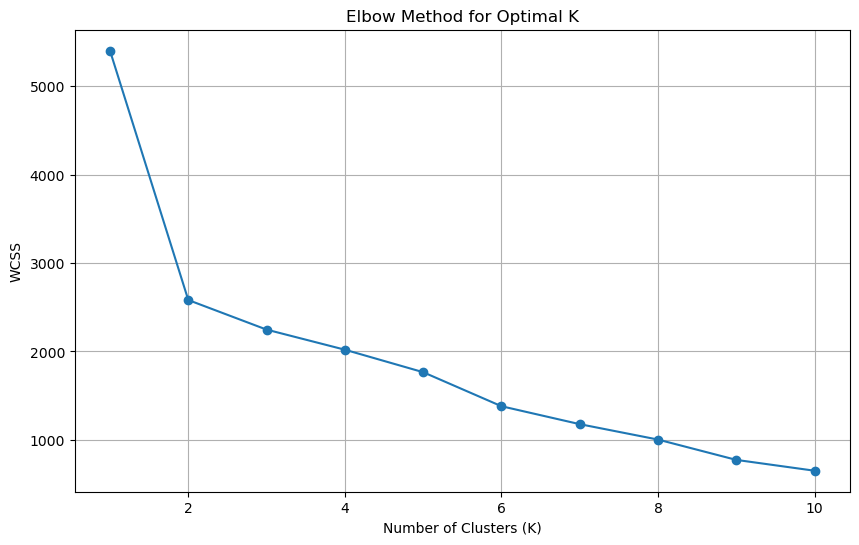

In [130]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

X.columns = X.columns.astype(str)


wcss = []

# Set the range of K values to test
k_values = range(1, 11)


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


In [133]:

encoder = OneHotEncoder(sparse=False)
encoded_departments = encoder.fit_transform(df[['Department']])
encoded_df = pd.DataFrame(encoded_departments, columns=encoder.get_feature_names_out(['Department']))

# Combine numeric batch and encoded department features
combined_df = pd.concat([df[['batch']], encoded_df], axis=1)

# Initialize KMeans with 20 clusters (you can adjust this as needed)
kmeans = KMeans(n_clusters=20, random_state=42)
df['cluster'] = kmeans.fit_predict(combined_df)

# Store cluster assignments and total student count in a DataFrame
cluster_counts = []
for cluster_id in range(20):
    cluster_data = df[df['cluster'] == cluster_id]
    total_students = len(cluster_data)
    cluster_counts.append({'ClusterID': cluster_id, 'TotalStudents': total_students,
                           'Department': cluster_data['Department'].iloc[0],
                           'Batch': cluster_data['batch'].iloc[0]})
    print(f"Cluster {cluster_id} - Total Students: {total_students}")
    for _, student in cluster_data.iterrows():
        print(f"    Student ID: {student['StudentID']}, Department: {student['Department']}, Batch: {student['batch']}, Cluster: {cluster_id}")

cluster_counts_df = pd.DataFrame(cluster_counts)

# Write the data to a CSV file
output_csv = 'cluster_assignments.csv'
df.to_csv(output_csv, index=False)

print(f"Cluster assignments and total student count saved to {output_csv}")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 - Total Students: 98
    Student ID: 20F-0509, Department: AI, Batch: 20, Cluster: 0
    Student ID: 20F-0511, Department: AI, Batch: 20, Cluster: 0
    Student ID: 20F-0515, Department: AI, Batch: 20, Cluster: 0
    Student ID: 20F-0520, Department: AI, Batch: 20, Cluster: 0
    Student ID: 20F-0528, Department: AI, Batch: 20, Cluster: 0
    Student ID: 20F-0533, Department: AI, Batch: 20, Cluster: 0
    Student ID: 20F-0540, Department: AI, Batch: 20, Cluster: 0
    Student ID: 20F-0541, Department: AI, Batch: 20, Cluster: 0
    Student ID: 20F-0551, Department: AI, Batch: 20, Cluster: 0
    Student ID: 20F-0559, Department: AI, Batch: 20, Cluster: 0
    Student ID: 20F-0560, Department: AI, Batch: 20, Cluster: 0
    Student ID: 20F-0564, Department: AI, Batch: 20, Cluster: 0
    Student ID: 20F-0571, Department: AI, Batch: 20, Cluster: 0
    Student ID: 20F-0578, Department: AI, Batch: 20, Cluster: 0
    Student ID: 20F-0584, Department: AI, Batch: 20, Cluster: 0
    Stude

In [134]:
print(cluster_data)


     StudentID    Name Department  batch  cluster
1002  21F-1003   Aisha         CS     21       19
1009  21F-1010    Zara         CS     21       19
1010  21F-1011  Sophia         CS     21       19
1013  21F-1014  Fatima         CS     21       19
1016  21F-1017  Olivia         CS     21       19
...        ...     ...        ...    ...      ...
1451  21F-1452   Aarav         CS     21       19
1458  21F-1459  Vikram         CS     21       19
1465  21F-1466   Rohan         CS     21       19
1466  21F-1467    Amir         CS     21       19
1474  21F-1475    Neha         CS     21       19

[89 rows x 5 columns]


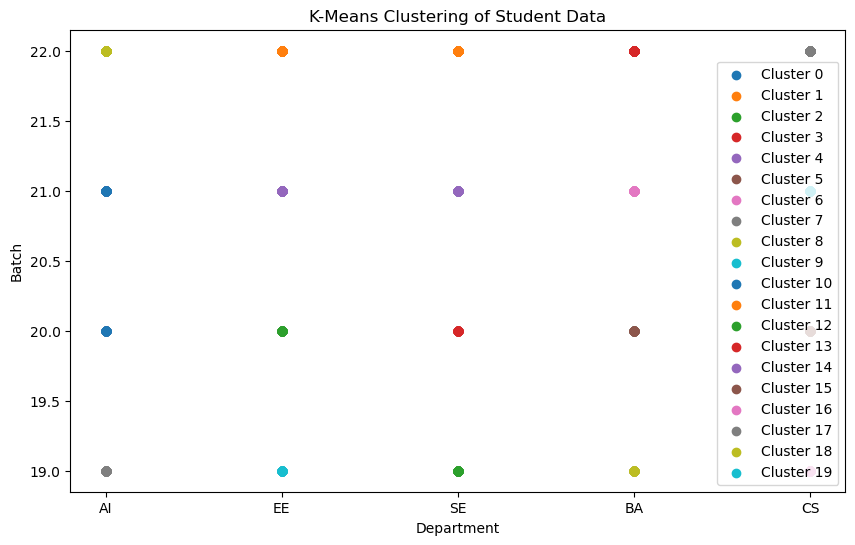

In [124]:
plt.figure(figsize=(10, 6))
for cluster_id in range(20):
    cluster_data = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_data['Department'], cluster_data['batch'], label=f'Cluster {cluster_id}')

plt.xlabel('Department')
plt.ylabel('Batch')
plt.title('K-Means Clustering of Student Data')
plt.legend()
plt.show()


In [29]:
import pandas as pd

# Create a DataFrame with room data
room_data = {
    'RoomID': ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10',
               'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19', 'R20',
               'R21', 'R22', 'R23', 'R24', 'R25', 'R26', 'R27', 'R28', 'R29', 'R30'],
    'Capacity': [35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
                 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
                 25, 25, 25, 25, 25, 25, 25, 25, 25, 25]
}

room_df = pd.DataFrame(room_data)

# Calculate total capacity for each room size
total_capacity_25 = room_df[room_df['Capacity'] == 25]['Capacity'].sum()
total_capacity_30 = room_df[room_df['Capacity'] == 30]['Capacity'].sum()
total_capacity_35 = room_df[room_df['Capacity'] == 35]['Capacity'].sum()
total_capacity_all = total_capacity_25 + total_capacity_30 + total_capacity_35 

# Count the number of rooms for each capacity
num_rooms_25 = room_df[room_df['Capacity'] == 25]['RoomID'].count()
num_rooms_30 = room_df[room_df['Capacity'] == 30]['RoomID'].count()
num_rooms_35 = room_df[room_df['Capacity'] == 35]['RoomID'].count()

print("Room Capacity Summary:")
print(f"Total capacity for rooms with 25 seats: {total_capacity_25}")
print(f"Total capacity for rooms with 30 seats: {total_capacity_30}")
print(f"Total capacity for rooms with 35 seats: {total_capacity_35}\n")
print(f"Total Capacity in All rooms: {total_capacity_all}\n")

print("Number of Rooms Summary:")
print(f"Number of rooms with 25 seats: {num_rooms_25}")
print(f"Number of rooms with 30 seats: {num_rooms_30}")
print(f"Number of rooms with 35 seats: {num_rooms_35}")


Room Capacity Summary:
Total capacity for rooms with 25 seats: 250
Total capacity for rooms with 30 seats: 300
Total capacity for rooms with 35 seats: 350

Total Capacity in All rooms: 900

Number of Rooms Summary:
Number of rooms with 25 seats: 10
Number of rooms with 30 seats: 10
Number of rooms with 35 seats: 10


In [144]:

room_df = pd.DataFrame(room_data)

# Function to assign clusters to rooms
def assign_rooms(clusters, rooms):
    room_assignments = {}
    room_idx = 0
    for cluster, total_students in clusters.items():
        while total_students > 0 and room_idx < len(rooms):
            room_capacity = rooms.iloc[room_idx]['Capacity']
            if total_students <= room_capacity:
                if room_assignments.get(room_idx) is None:
                    room_assignments[room_idx] = [(cluster, total_students)]
                else:
                    room_assignments[room_idx].append((cluster, total_students))
                total_students = 0
            else:
                if room_assignments.get(room_idx) is None:
                    room_assignments[room_idx] = [(cluster, room_capacity)]
                else:
                    room_assignments[room_idx].append((cluster, room_capacity))
                total_students -= room_capacity
            room_idx += 1
    remaining_clusters = {cluster: total_students for cluster, total_students in clusters.items() if total_students > 0}
    return room_assignments, remaining_clusters


clusters_day1 = {
    0: 98, 1: 200, 2: 117, 3: 215, 4: 95, 5: 94, 6: 97, 7: 198, 8: 205, 9: 102,
    10: 114, 11: 182, 12: 111, 13: 100, 14: 112, 15: 97, 16: 90, 17: 94, 18: 90,
    19: 89
}

room_assignments_day1, remaining_clusters_day1 = assign_rooms(clusters_day1, room_df)


for room_idx, assignments in room_assignments_day1.items():
    room_id = room_df.iloc[room_idx]['RoomID']
    print(f"Room {room_id}:")
    for cluster, students in assignments:
        print(f"    Cluster {cluster}: {students} students")
    print()

# Assign clusters to rooms for day 2
clusters_day2 = {cluster: total_students for cluster, total_students in remaining_clusters_day1.items() if cluster >= 6}
room_assignments_day2, remaining_clusters_day2 = assign_rooms(clusters_day2, room_df)

# Print room assignments for day 2
for room_idx, assignments in room_assignments_day2.items():
    room_id = room_df.iloc[room_idx]['RoomID']
    print(f"Room {room_id} (Day 2):")
    for cluster, students in assignments:
        print(f"    Cluster {cluster}: {students} students")
    print()

# Assign clusters to rooms for day 3
clusters_day3 = {cluster: total_students for cluster, total_students in remaining_clusters_day2.items() if cluster >= 11}
room_assignments_day3, remaining_clusters_day3 = assign_rooms(clusters_day3, room_df)

# Print room assignments for day 3
for room_idx, assignments in room_assignments_day3.items():
    room_id = room_df.iloc[room_idx]['RoomID']
    print(f"Room {room_id} (Day 3):")
    for cluster, students in assignments:
        print(f"    Cluster {cluster}: {students} students")
    print()

# Assign clusters to rooms for day 4
clusters_day4 = {cluster: total_students for cluster, total_students in remaining_clusters_day3.items() if cluster >= 17}
room_assignments_day4, remaining_clusters_day4 = assign_rooms(clusters_day4, room_df)

# Print room assignments for day 4
for room_idx, assignments in room_assignments_day4.items():
    room_id = room_df.iloc[room_idx]['RoomID']
    print(f"Room {room_id} (Day 4):")
    for cluster, students in assignments:
        print(f"    Cluster {cluster}: {students} students")
    print()


Room R1:
    Cluster 0: 35 students

Room R2:
    Cluster 0: 35 students

Room R3:
    Cluster 0: 28 students

Room R4:
    Cluster 1: 35 students

Room R5:
    Cluster 1: 35 students

Room R6:
    Cluster 1: 35 students

Room R7:
    Cluster 1: 35 students

Room R8:
    Cluster 1: 35 students

Room R9:
    Cluster 1: 25 students

Room R10:
    Cluster 2: 35 students

Room R11:
    Cluster 2: 30 students

Room R12:
    Cluster 2: 30 students

Room R13:
    Cluster 2: 22 students

Room R14:
    Cluster 3: 30 students

Room R15:
    Cluster 3: 30 students

Room R16:
    Cluster 3: 30 students

Room R17:
    Cluster 3: 30 students

Room R18:
    Cluster 3: 30 students

Room R19:
    Cluster 3: 30 students

Room R20:
    Cluster 3: 30 students

Room R21:
    Cluster 3: 5 students

Room R22:
    Cluster 4: 25 students

Room R23:
    Cluster 4: 25 students

Room R24:
    Cluster 4: 25 students

Room R25:
    Cluster 4: 20 students

Room R26:
    Cluster 5: 25 students

Room R27:
    Cluster 

In [146]:

# Read cluster assignment data
cluster_assignments_df = pd.read_csv('cluster_assignments.csv')


def assign_rooms(clusters, rooms, student_data):
    room_assignments = {}
    remaining_clusters = clusters.copy()
    for room_idx, row in rooms.iterrows():
        room_capacity = row['Capacity']
        students_assigned = 0
        for cluster, size in remaining_clusters.items():
            if size == 0:
                continue
            if size + students_assigned <= room_capacity:
                # Assign all students in the cluster to this room
                students = student_data.loc[student_data['cluster'] == cluster].head(size)
                if room_assignments.get(room_idx) is None:
                    room_assignments[room_idx] = []
                room_assignments[room_idx].append((cluster, students))
                students_assigned += size
                remaining_clusters[cluster] = 0
            else:
                # Assign part of the cluster to this room
                students = student_data.loc[student_data['cluster'] == cluster].head(room_capacity - students_assigned)
                if room_assignments.get(room_idx) is None:
                    room_assignments[room_idx] = []
                room_assignments[room_idx].append((cluster, students))
                remaining_clusters[cluster] -= room_capacity - students_assigned
                students_assigned = room_capacity
            if students_assigned == room_capacity:
                break
    return room_assignments, remaining_clusters

# Assign clusters to rooms for each day
remaining_clusters = clusterstotal.copy()
for day in range(1, 5):
    room_assignments_day, remaining_clusters_day = assign_rooms(remaining_clusters, room_df, cluster_assignments_df)

    # Print room assignments for the day
    print(f"Day {day} Room Assignments:")
    for room_idx, assignments in room_assignments_day.items():
        room_id = room_df.iloc[room_idx]['RoomID']
        print(f"    Room {room_id}:")
        for cluster, students in assignments:
            print(f"        Cluster {cluster}:")
            for _, student in students.iterrows():
                print(f"            Student ID: {student['StudentID']}, Department: {student['Department']}, Batch: {student['batch']}")
    print()

    # Update remaining clusters for the next day
    remaining_clusters = remaining_clusters_day.copy()


Day 1 Room Assignments:
    Room R1:
        Cluster 0:
            Student ID: 20F-0509, Department: AI, Batch: 20
            Student ID: 20F-0511, Department: AI, Batch: 20
            Student ID: 20F-0515, Department: AI, Batch: 20
            Student ID: 20F-0520, Department: AI, Batch: 20
            Student ID: 20F-0528, Department: AI, Batch: 20
            Student ID: 20F-0533, Department: AI, Batch: 20
            Student ID: 20F-0540, Department: AI, Batch: 20
            Student ID: 20F-0541, Department: AI, Batch: 20
            Student ID: 20F-0551, Department: AI, Batch: 20
            Student ID: 20F-0559, Department: AI, Batch: 20
            Student ID: 20F-0560, Department: AI, Batch: 20
            Student ID: 20F-0564, Department: AI, Batch: 20
            Student ID: 20F-0571, Department: AI, Batch: 20
            Student ID: 20F-0578, Department: AI, Batch: 20
            Student ID: 20F-0584, Department: AI, Batch: 20
            Student ID: 20F-0591, Department